<a href="https://colab.research.google.com/github/vidya100804/DEEP-LEARNING-EXPERIMENTS/blob/main/Exp_7_Vg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 784s 19s/step - accuracy: 0.4936 - loss: 0.7836 - val_accuracy: 0.6150 - val_loss: 0.6895
Epoch 2/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 734s 18s/step - accuracy: 0.5491 - loss: 0.7066 - val_accuracy: 0.4970 - val_loss: 0.6932
Epoch 3/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 757s 19s/step - accuracy: 0.5135 - loss: 0.6928 - val_accuracy: 0.4970 - val_loss: 0.6875
8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.5069 - loss: 0.6868

Validation Accuracy: 49.70%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


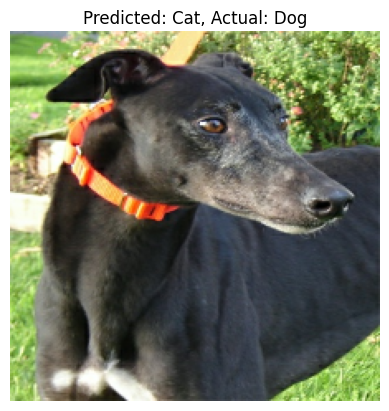

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(dataset_name, as_supervised=True, with_info=True)

train_data = dataset['train'].take(5000)
val_data = dataset['train'].skip(20000).take(1000)

def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0
    return image, label

train_data = train_data.map(preprocess).batch(128).shuffle(1000)
val_data = val_data.map(preprocess).batch(128)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=(2,2), padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=3)

loss, acc = model.evaluate(val_data)
print(f"\nValidation Accuracy: {acc * 100:.2f}%")

def show_prediction():
    image, label = next(iter(val_data))
    img = image[0].numpy()
    true_label = label[0].numpy()

    prediction = model.predict(tf.expand_dims(image[0], axis=0))
    predicted_label = "Dog" if prediction[0][0] > 0.5 else "Cat"

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}, Actual: {'Dog' if true_label else 'Cat'}")
    plt.axis("off")
    plt.show()

show_prediction()